In [2]:
import yfinance as yf
import pandas as pd

# 下载AAPL的股票数据
aapl = yf.Ticker("AAPL")

# 获取2023年的股票日数据
df = aapl.history(start="2023-01-01", end="2023-12-31")

# 计算移动平均线和RSI
def calculate_moving_averages(df, short_window=20, long_window=50):
    df['Short_MA'] = df['Close'].rolling(window=short_window, min_periods=1).mean()
    df['Long_MA'] = df['Close'].rolling(window=long_window, min_periods=1).mean()

def calculate_rsi(df, window=14):
    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    RS = gain / loss
    df['RSI'] = 100 - (100 / (1 + RS))

calculate_moving_averages(df)
calculate_rsi(df)

# 显示结果
print(df[['Close', 'Short_MA', 'Long_MA', 'RSI']].tail())



/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


                                Close    Short_MA     Long_MA        RSI
Date                                                                    
2023-12-22 00:00:00-05:00  193.600006  193.668501  185.306513  59.246142
2023-12-26 00:00:00-05:00  193.050003  193.831501  185.595219  49.031934
2023-12-27 00:00:00-05:00  193.149994  193.969001  185.888522  52.291513
2023-12-28 00:00:00-05:00  193.580002  194.179501  186.221783  47.920430
2023-12-29 00:00:00-05:00  192.529999  194.308501  186.560211  40.185177


[*********************100%%**********************]  1 of 1 completed


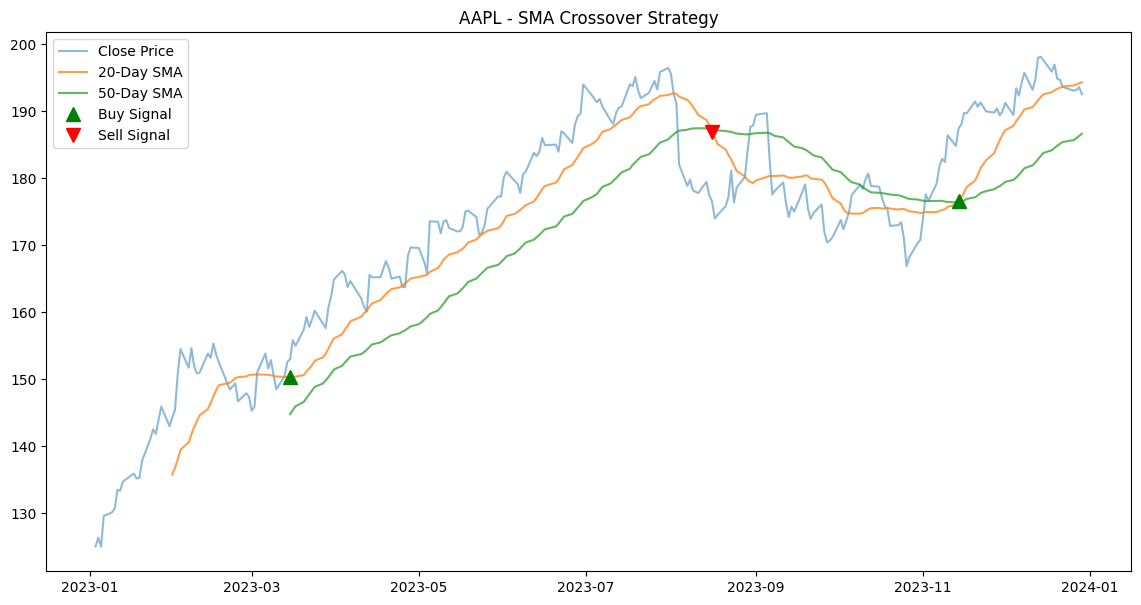

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 获取股票数据
def get_stock_data(ticker, start_date, end_date):
    """
    使用yfinance获取股票数据
    """
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# 计算简单移动平均线
def calculate_sma(data, window):
    """
    计算给定窗口大小的简单移动平均线
    """
    sma = data['Close'].rolling(window=window).mean()
    return sma

# 实现SMA交叉策略
def sma_strategy(data, short_window, long_window):
    """
    基于SMA交叉的交易策略
    """
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # 计算短期和长期SMA
    signals['short_sma'] = calculate_sma(data, short_window)
    signals['long_sma'] = calculate_sma(data, long_window)

    # 生成买卖信号
    signals['signal'][short_window:] = np.where(signals['short_sma'][short_window:] > signals['long_sma'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()

    return signals

# 使用AAPL股票数据作为示例
ticker = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
data = get_stock_data(ticker, start_date, end_date)

# 应用SMA交叉策略
short_window = 20
long_window = 50
signals = sma_strategy(data, short_window, long_window)

# 绘制股价和SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(signals['short_sma'], label='20-Day SMA', alpha=0.75)
plt.plot(signals['long_sma'], label='50-Day SMA', alpha=0.75)
plt.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_sma[signals.positions == 1.0],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_sma[signals.positions == -1.0],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('AAPL - SMA Crossover Strategy')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index 

251    129.696552
252    129.458671
253    129.133385
254    129.457301
255    129.510703
Name: predicted_mean, dtype: float64


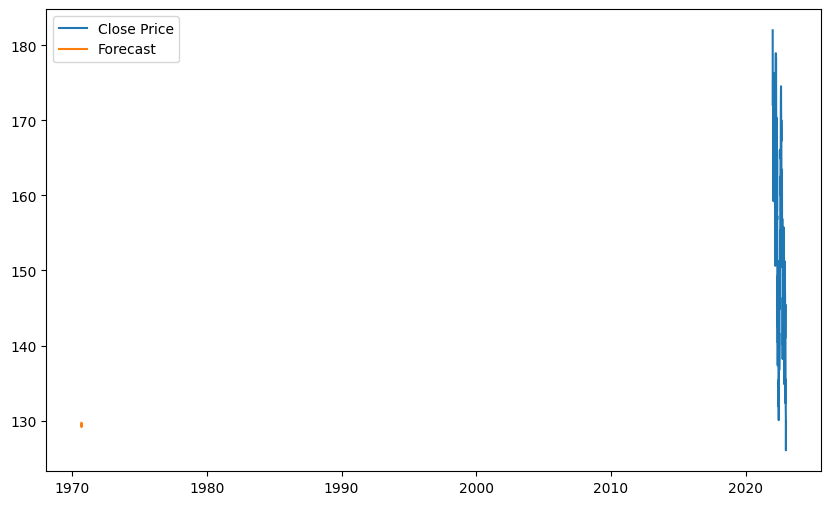

In [5]:
#ARIMA模型实现
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import matplotlib.pyplot as plt

# 获取数据
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')['Close']
data = pd.DataFrame(data)

# 训练ARIMA模型
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

# 预测
forecast = model_fit.forecast(steps=5)
print(forecast)

# 可视化
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [6]:
#LSTM模型实现
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# 获取数据
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')['Close']
data = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

# 创建数据集
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0],X.shape[1] , 1)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# 训练模型
model.fit(X, y, epochs=100, batch_size=64, verbose=1)

# 预测（这里简化了预测过程，实际应用中需要对数据进行适当处理）
test_predict = model.predict(X)

# 反转预测
test_predict = scaler.inverse_transform(test_predict)


[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
3/3 [==============================] - 4s 98ms/step - loss: 0.1368
Epoch 2/100
3/3 [==============================] - 0s 91ms/step - loss: 0.0334
Epoch 3/100
3/3 [==============================] - 0s 92ms/step - loss: 0.0415
Epoch 4/100
3/3 [==============================] - 0s 92ms/step - loss: 0.0242
Epoch 5/100
3/3 [==============================] - 0s 92ms/step - loss: 0.0195
Epoch 6/100
3/3 [==============================] - 0s 96ms/step - loss: 0.0224
Epoch 7/100
3/3 [==============================] - 0s 95ms/step - loss: 0.0198
Epoch 8/100
3/3 [==============================] - 0s 90ms/step - loss: 0.0166
Epoch 9/100
3/3 [==============================] - 0s 134ms/step - loss: 0.0170
Epoch 10/100
3/3 [==============================] - 0s 151ms/step - loss: 0.0173
Epoch 11/100
3/3 [==============================] - 0s 149ms/step - loss: 0.0155
Epoch 12/100
3/3 [==============================] - 0s 150ms/step - loss: 0.0152
Epoch 13/100
3/3 [===========================

[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
3/3 [==============================] - 8s 95ms/step - loss: 0.1832
Epoch 2/100
3/3 [==============================] - 0s 91ms/step - loss: 0.0599
Epoch 3/100
3/3 [==============================] - 0s 90ms/step - loss: 0.0265
Epoch 4/100
3/3 [==============================] - 0s 99ms/step - loss: 0.0372
Epoch 5/100
3/3 [==============================] - 0s 89ms/step - loss: 0.0205
Epoch 6/100
3/3 [==============================] - 0s 92ms/step - loss: 0.0190
Epoch 7/100
3/3 [==============================] - 0s 100ms/step - loss: 0.0209
Epoch 8/100
3/3 [==============================] - 0s 92ms/step - loss: 0.0197
Epoch 9/100
3/3 [==============================] - 0s 90ms/step - loss: 0.0168
Epoch 10/100
3/3 [==============================] - 0s 91ms/step - loss: 0.0153
Epoch 11/100
3/3 [==============================] - 0s 95ms/step - loss: 0.0158
Epoch 12/100
3/3 [==============================] - 0s 148ms/step - loss: 0.0156
Epoch 13/100
3/3 [=============================

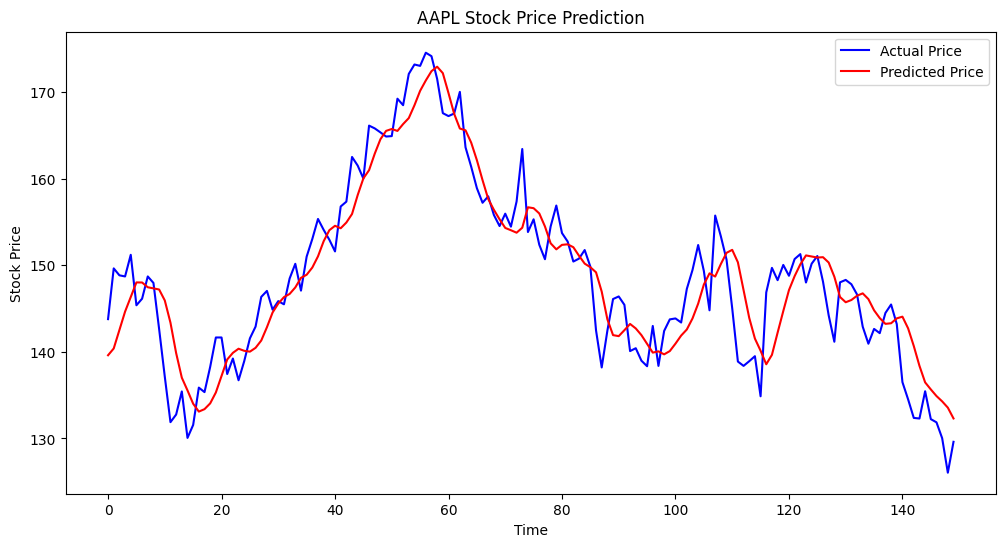

In [7]:
# 导入所需的库
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 获取数据
data = yf.download('AAPL', start='2022-01-01', end='2023-01-01')['Close']
data = pd.DataFrame(data)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

# 创建数据集
def create_dataset(data, time_step=100):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X, y = create_dataset(data_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# 构建LSTM模型
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 训练模型
model.fit(X, y, epochs=100, batch_size=64, verbose=1)

# 预测
test_predict = model.predict(X)

# 反转预测
test_predict = scaler.inverse_transform(test_predict)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y.reshape(-1, 1)), label='Actual Price', color='blue')
plt.plot(test_predict, label='Predicted Price', color='red')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
